# Zoom Region

In [1]:
from pathlib import Path

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

In [2]:
zr_dir = Path('../../data/zoom_region')
rads = list(range(2, 7))

def load(sim):
    zr = {}

    # Load points
    zr['orig'] = np.loadtxt(str(zr_dir / f'{sim}.txt'))
    with (zr_dir / f'{sim}_ref13_shift.conf').open() as f:
        shift = f.readline().split('=')[1]
        shift = np.array([int(x) for x in shift.split(',')]) / (2 ** 8)
    for rad in rads:
        zr[f'rad{rad}'] = np.loadtxt(str(zr_dir / f'{sim}_ref13_rad{rad}.txt'))
        zr[f'rad{rad}'] -= shift

    # Convert to convex hull
    labels = ['orig'] + [f'rad{rad}' for rad in rads]
    print('Convex hull volume (scaled by orig):')
    for label in labels:
        zr[label] = ConvexHull(zr[label])
        volume = zr[label].volume / zr['orig'].volume
        print(label, f'{volume:.2f}')
    
    return zr

In [3]:
def plot_hull(points, c, ls, ax, label):
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        ax.plot(points[simplex, 0], points[simplex, 1], c=c, ls=ls)
    ax.plot(points[simplex, 0], points[simplex, 1], c=c, ls=ls, label=label)

def plot_ax(zr, xaxis, yaxis, ax):
    for label in ['orig'] + [f'rad{rad}' for rad in rads]:
        hull = zr[label]
        points = hull.points[:, [xaxis, yaxis]]
        x, y = points.T
        l, = ax.plot(x, y, '.', ms=1)
        ls = '-'
        if label == 'orig':
            ls = '--'
        plot_hull(points, l.get_color(), ls, ax, label)

def plot(zr):
    fig, ax = plt.subplots(2, 2, sharex='col', sharey='row',
                       figsize=(8, 8))
    plot_ax(zr, 0, 1, ax[0, 1])
    ax[0, 1].legend()
    plot_ax(zr, 2, 1, ax[0, 0])
    plot_ax(zr, 0, 2, ax[1, 1])
    ax[0, 0].set_ylabel('y')
    ax[1, 0].set_ylabel('z')
    ax[1, 0].set_xlabel('z')
    ax[1, 1].set_xlabel('x')
    plt.tight_layout()

## z2h350

Convex hull volume (scaled by orig):
orig 1.00
rad2 0.63
rad3 0.81
rad4 1.08
rad5 1.37
rad6 1.72


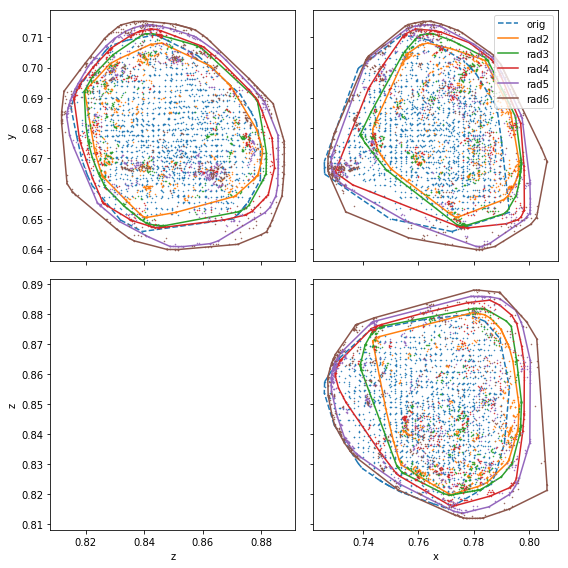

In [4]:
zr = load('z2h350')
plot(zr)

## z2h600

Convex hull volume (scaled by orig):
orig 1.00
rad2 0.69
rad3 0.94
rad4 1.20
rad5 1.49
rad6 2.11


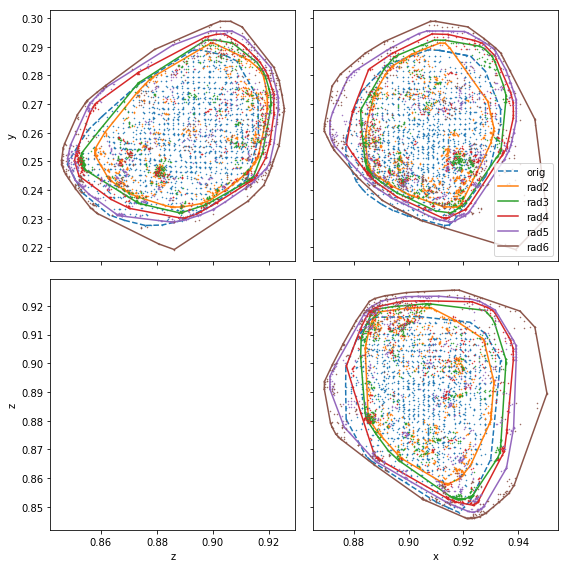

In [5]:
zr = load('z2h600')
plot(zr)